In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
img = image.load_img('computer vision/basedata/training/happy/7.jpg')

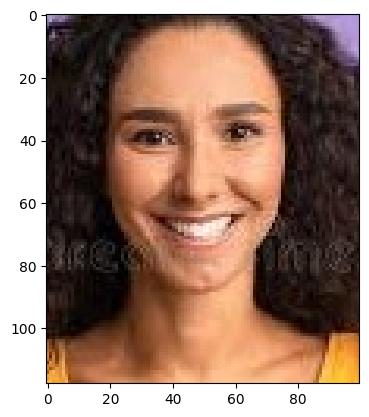

In [3]:
plt.imshow(img)

In [4]:
cv2.imread('computer vision/basedata/training/happy/2.jpg')

array([[[238, 237, 233],
        [238, 237, 233],
        [239, 238, 234],
        ...,
        [238, 239, 235],
        [238, 239, 235],
        [237, 238, 234]],

       [[238, 237, 233],
        [239, 238, 234],
        [239, 238, 234],
        ...,
        [237, 238, 234],
        [236, 237, 233],
        [236, 237, 233]],

       [[238, 237, 233],
        [239, 238, 234],
        [240, 239, 235],
        ...,
        [236, 237, 233],
        [236, 237, 233],
        [235, 236, 232]],

       ...,

       [[ 58, 129, 192],
        [ 35, 107, 167],
        [  0,  67, 123],
        ...,
        [133, 214, 252],
        [133, 214, 252],
        [132, 213, 251]],

       [[ 34, 109, 177],
        [  2,  79, 142],
        [  0,  62, 119],
        ...,
        [133, 213, 254],
        [133, 213, 254],
        [132, 212, 253]],

       [[ 15,  92, 161],
        [  0,  70, 136],
        [ 44, 126, 184],
        ...,
        [136, 216, 255],
        [136, 216, 255],
        [135, 215, 255]]

In [5]:
cv2.imread('computer vision/basedata/training/happy/2.jpg').shape

(144, 127, 3)

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory('computer vision/basedata/training', 
                                          target_size= (100, 100),
                                          batch_size = 3, 
                                          class_mode = 'binary')

Found 38 images belonging to 3 classes.


In [8]:
validation_dataset = validation.flow_from_directory('computer vision/basedata/validation', 
                                          target_size= (100, 100),
                                          batch_size = 3, 
                                          class_mode = 'binary')

Found 30 images belonging to 3 classes.


In [9]:
train_dataset = train.flow_from_directory(
    'computer vision/basedata/training',
    target_size=(100, 100),
    batch_size=3,
    class_mode='binary',
    classes=['not_happy', 'happy']  # not_happy = 0, happy = 1
)

Found 38 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'not_happy': 0, 'happy': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape= (100,100,3)),
                                      tf.keras.layers.MaxPool2D(2,2), 
                                      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2,2),
                                      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2,2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation = 'relu'),
                                      tf.keras.layers.Dense(1, activation = 'sigmoid')
                                      ])
                                     

In [14]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])                     

In [17]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 1.7280e-05 - val_accuracy: 0.6667 - val_loss: 8.4235
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 2.0775e-05 - val_accuracy: 0.6667 - val_loss: 8.7344
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.5137e-05 - val_accuracy: 0.6667 - val_loss: 8.9537
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 4.7955e-06 - val_accuracy: 0.6667 - val_loss: 9.0411
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 7.6017e-06 - val_accuracy: 0.6667 - val_loss: 9.1888
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 4.6254e-06 - val_accuracy: 0.6667 - val_loss: 9.1597
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 3.6673e-06 - val_accuracy: 0.6667 - val_loss: 9.2248
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 2.1938e-05 - val_accu

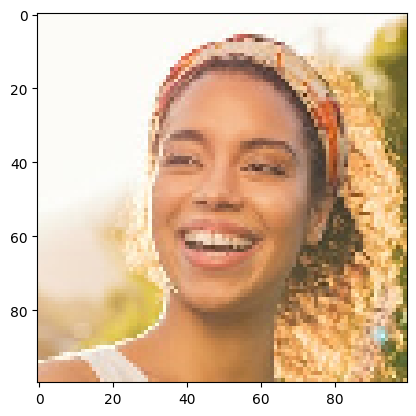

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
you are happy


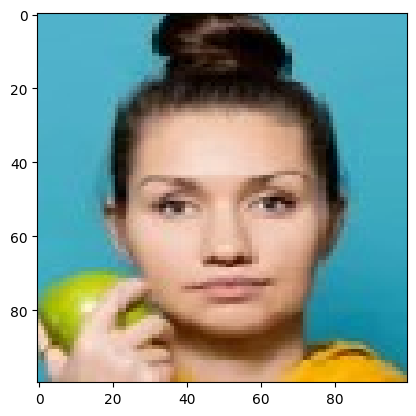

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
you are not happy


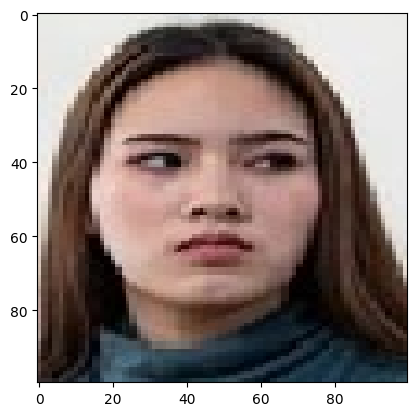

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
you are not happy


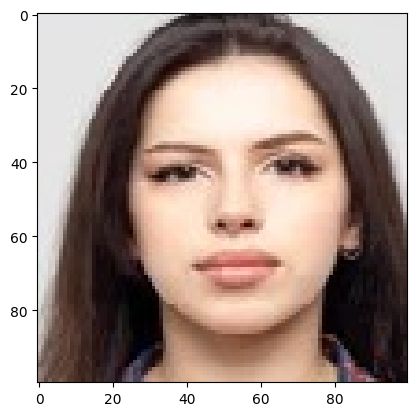

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
you are not happy


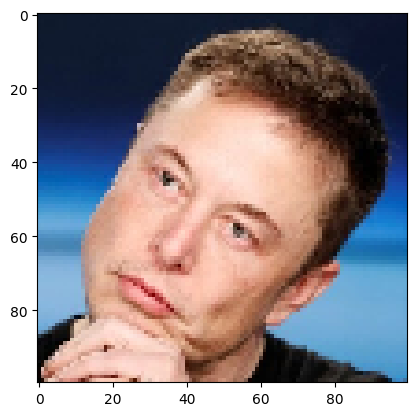

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
you are not happy


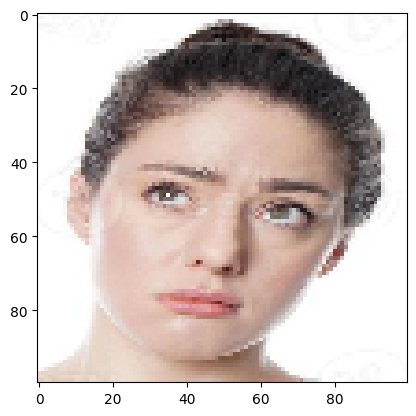

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
you are not happy


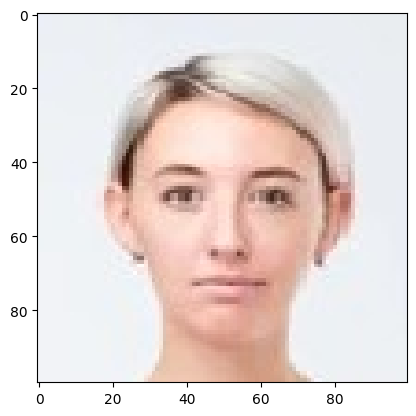

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
you are not happy


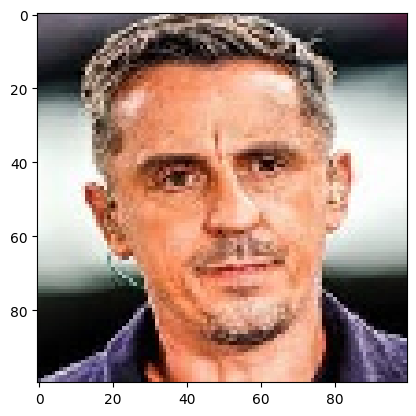

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
you are not happy


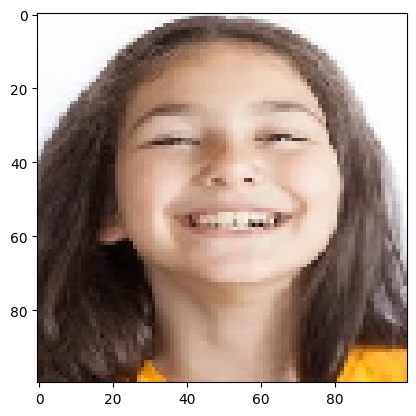

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
you are happy


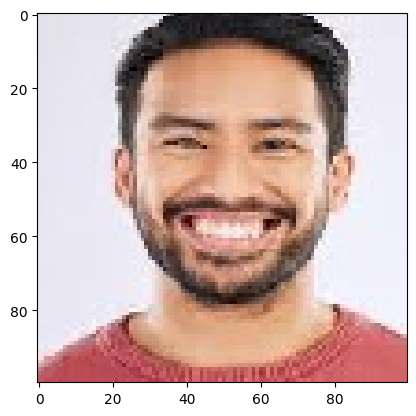

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
you are happy


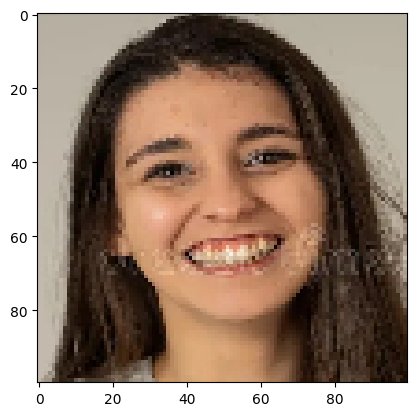

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
you are happy


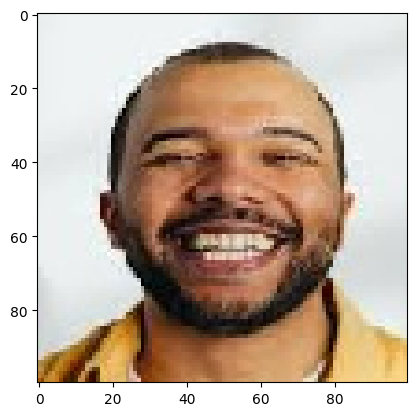

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
you are happy


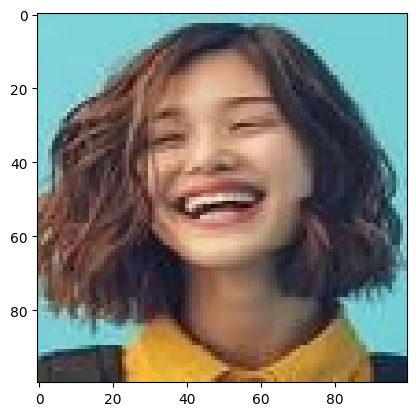

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
you are happy


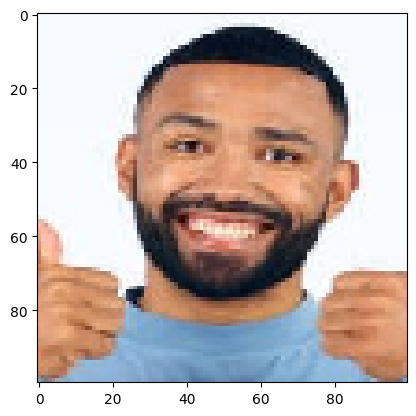

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
you are happy


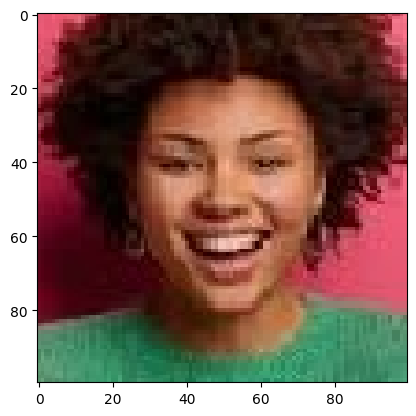

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
you are happy


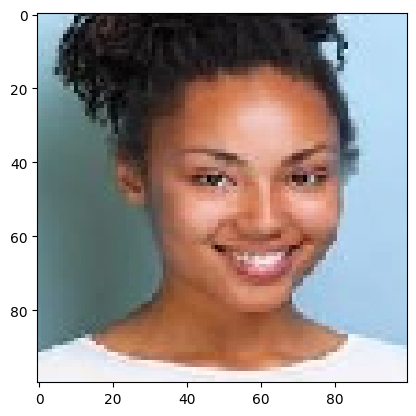

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
you are happy


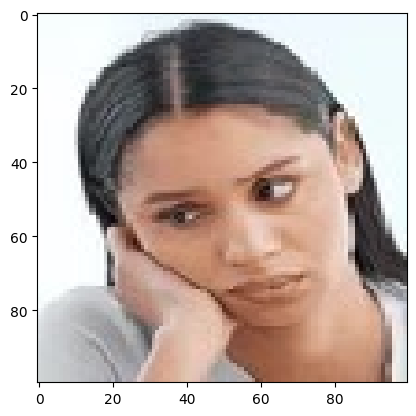

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
you are not happy


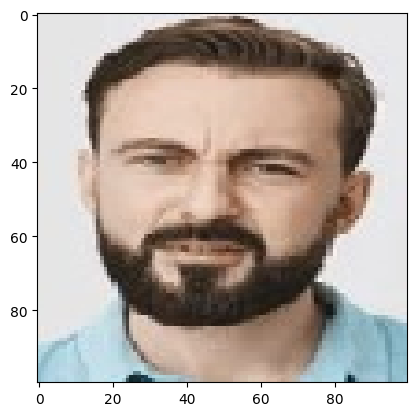

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
you are not happy


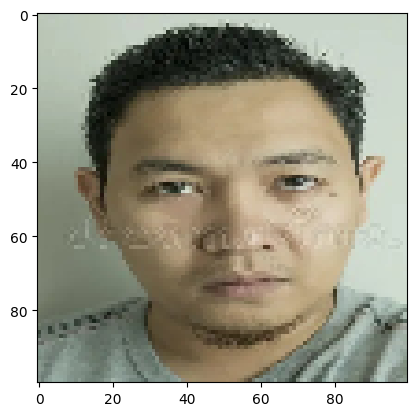

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
you are not happy


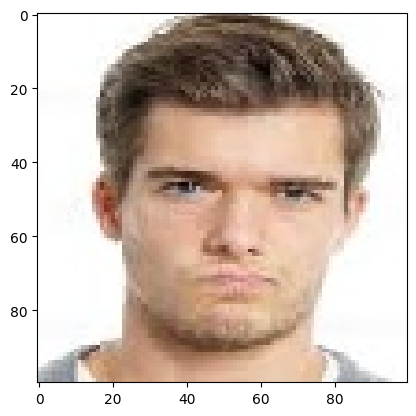

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
you are not happy


In [29]:
dir_path = "computer vision/basedata/testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//' + i, target_size=(100,100))
    plt.imshow(img)
    plt.show()

    X= image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])

    val = model.predict(images)
    if val ==0:
        print("you are not happy")
    else:
        print("you are happy")

In [30]:
import numpy as np
from keras.utils import load_img, img_to_array

# Step 1: Load and preprocess a single image
img_path = '11.jpg'  # Replace with your actual image path
img = load_img(img_path, target_size=(100, 100))  # Use same size as training
img_array = img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Step 2: Predict using your model
prediction = model.predict(img_array)

# Step 3: Interpret the prediction
if prediction[0] > 0.5:
    print("Prediction: Happy 😊")
else:
    print("Prediction: Not Happy 😐")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Prediction: Not Happy 😐
